# Exercise 03 - Autoregressive Integrated Moving Average Models

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 03.1 - Plot the ACF and PACF of the 4 series in data_arma.csv
### Try to say to which AR or MA process each series belong

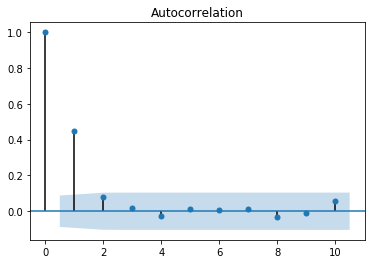

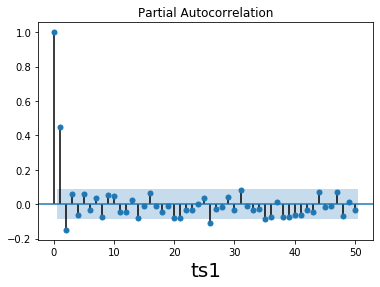

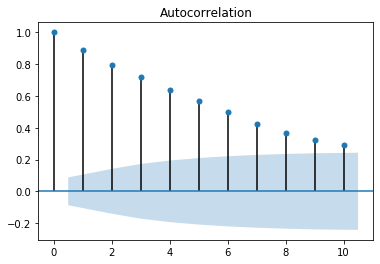

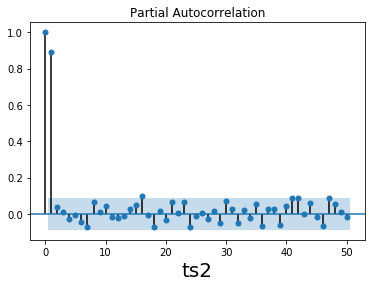

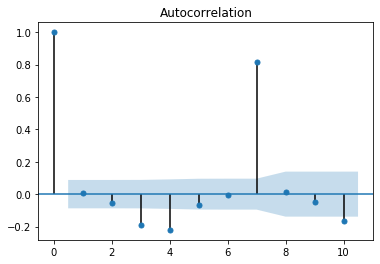

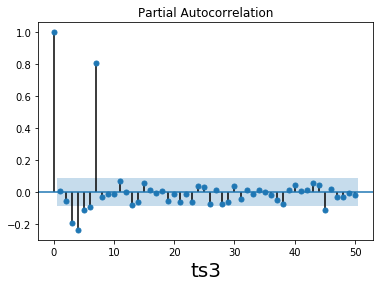

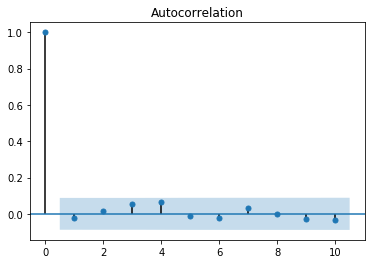

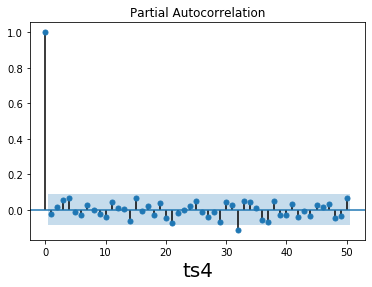

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

df = pd.read_csv('../datasets/data_arma.csv', index_col=0)
df.head()

cols = ['ts1','ts2','ts3','ts4']


for c in cols:
    plot_acf(df[c], lags=10 );
    plot_pacf(df[c], lags=50);
    plt.xlabel(c, fontsize=20);



ts1: AR estacionalidad 1
ts2: AR estacionalidad 2
ts3: AR estacionalidad 7
ts4: MA

# 03.2 - Using the shampoo dataset:
## Find the parameters p, d q that minimizes the mse of the rolling forecast
